In [80]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.rcParams['figure.dpi']= 100
matplotlib.rcParams['figure.figsize'] = 15, 5

import warnings
warnings.filterwarnings('ignore')

In [81]:
chunks = []

In [82]:
for i in range(21):
    filename = 'news_dataset/chunk{}.csv'.format(i + 1)
    df = pd.read_csv(filename)
    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date')
    chunks.append(df)

In [83]:
big_time_series = pd.concat(chunks, axis=0)

In [84]:
big_time_series.columns

Index(['content', 'count'], dtype='object')

In [85]:
def weighted_average_for_grouped(df):
    if df.empty:
        return None
    else:
        num_entries = df['count'].sum()
        weights = df['count'] / num_entries
        avg = np.average(df['content'], weights=weights)
        return avg

In [86]:
aggregated = big_time_series.groupby(pd.Grouper(freq='M')).apply(weighted_average_for_grouped)

In [87]:
print(aggregated)

date
2000-05-31    0.128602
2000-06-30         NaN
2000-07-31         NaN
2000-08-31         NaN
2000-09-30         NaN
                ...   
2017-11-30    0.065008
2017-12-31    0.064073
2018-01-31    0.065327
2018-02-28    0.070882
2018-03-31    0.066813
Freq: M, Length: 215, dtype: float64


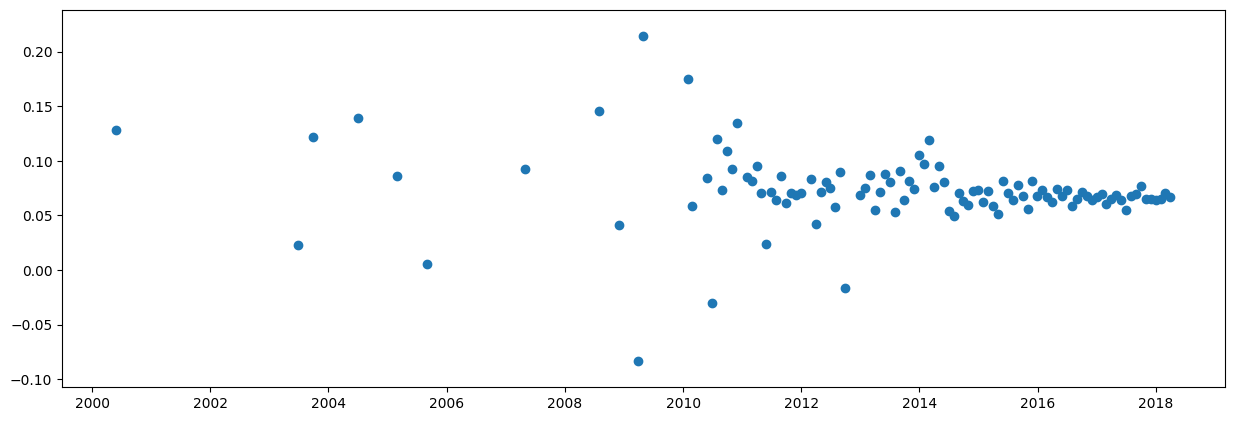

In [88]:
plt.scatter(aggregated.index, aggregated)

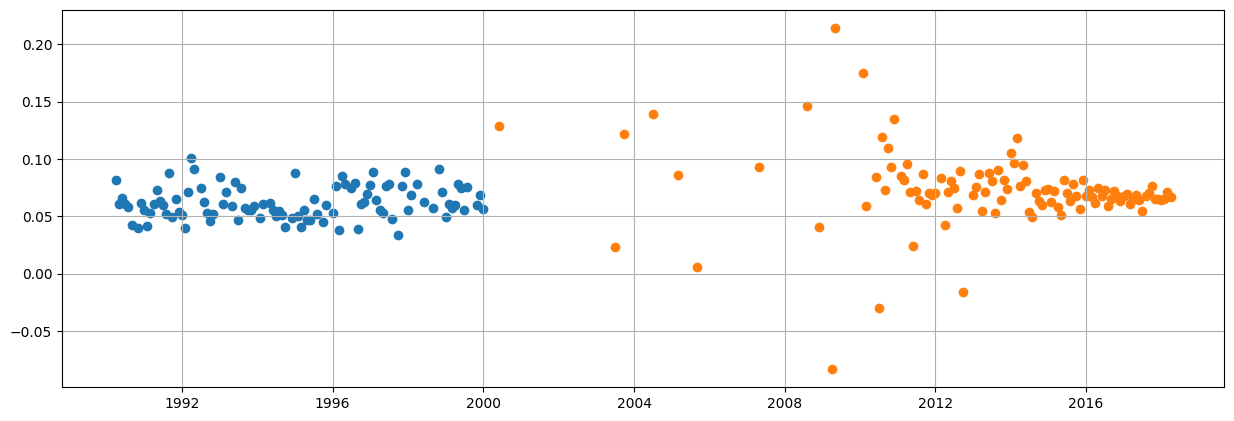

In [92]:
older = pd.read_csv('older_sentiment.csv')
older['date'] = pd.to_datetime(older['date'])
older = older.set_index('date')
plt.scatter(older.index, older['content'])
plt.scatter(aggregated.index, aggregated)
plt.grid(True)
plt.show()

In [191]:
ts = pd.concat([aggregated, older['content']])

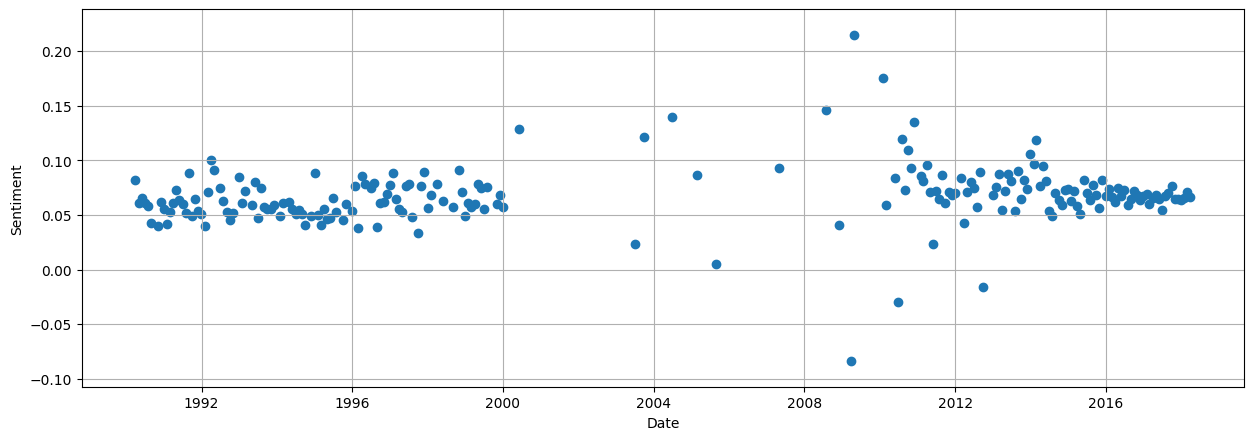

In [192]:
plt.scatter(ts.index, ts)
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.show()

In [193]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [194]:
ts.index = pd.to_datetime(ts.index, utc=True)

In [195]:
len(ts)

315

In [208]:
range_index = [i for i in range(len(ts))]
y = ts

In [209]:
not_missing = np.argwhere(~np.isnan(y))
nan_indices = np.argwhere(np.isnan(y))

In [202]:
train_x = not_missing
train_y = y[not_missing]
predict_x = nan_indices 

In [203]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(train_x)
pol_reg = LinearRegression()
pol_reg.fit(train_x, train_y)

predicted_y = pol_reg.predict(predict_x)

In [204]:
y[nan_indices] = predicted_y

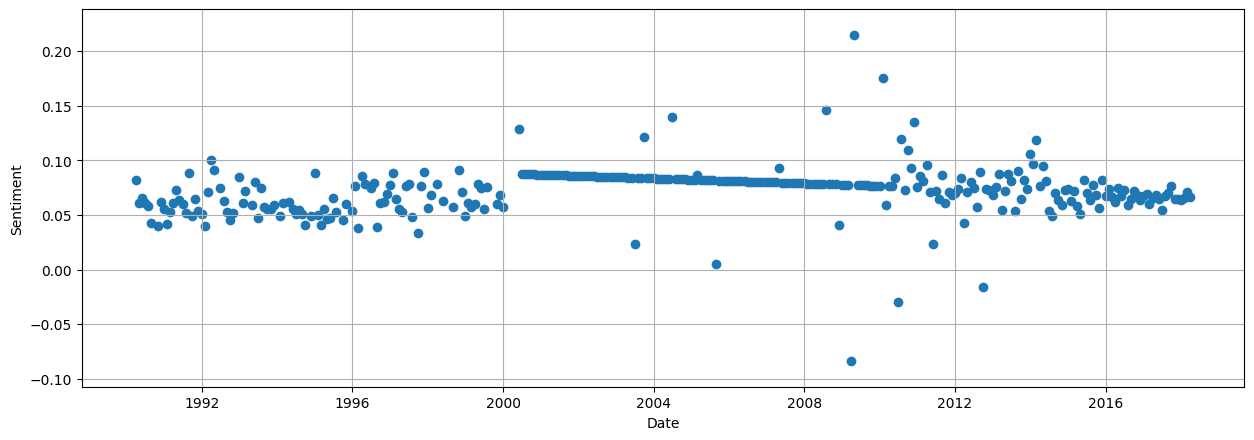

In [205]:
plt.scatter(y.index, y)
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.show()

In [206]:
y.to_csv('news_dataset/news_time_series.csv')